In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import scipy.stats
import re
import csv

In [3]:
df = pd.read_csv('ConsolidatedTwitter.csv',encoding='utf-8')

In [4]:
df


,Sr. no.,tweets,sentiment,classification
0,1,coronaviruscare el_pais Why am I not surprised...,neutral,opinion
1,2,Spain s el_pais reporting that a recent protoc...,neutral,opinion
2,3,South Korea s aggressive Coronavirus testing h...,neutral,reporting
3,4,South Korea s aggressive Coronavirus testing h...,neutral,reporting
4,5,South Korea s aggressive Coronavirus testing h...,neutral,reporting
5,6,Norway Sweden Denmark Scandinavian nations two...,neutral,reporting
6,7,South Korea s aggressive Coronavirus testing h...,neutral,reporting
7,8,The worst is definitely over in China All it t...,neutral,opinion
8,9,Spain s el_pais reporting that a recent protoc...,neutral,opinion
9,10,South Korea s aggressive Coronavirus testing h...,neutral,reporting


In [5]:
positive = pd.DataFrame()
positive = df.loc[df['sentiment'] == 'neutral']
positive.head()

,Sr. no.,tweets,sentiment,classification
0,1,coronaviruscare el_pais Why am I not surprised...,neutral,opinion
1,2,Spain s el_pais reporting that a recent protoc...,neutral,opinion
2,3,South Korea s aggressive Coronavirus testing h...,neutral,reporting
3,4,South Korea s aggressive Coronavirus testing h...,neutral,reporting
4,5,South Korea s aggressive Coronavirus testing h...,neutral,reporting


In [6]:
sns.set_style('whitegrid')

TypeError: can't multiply sequence by non-int of type 'float'

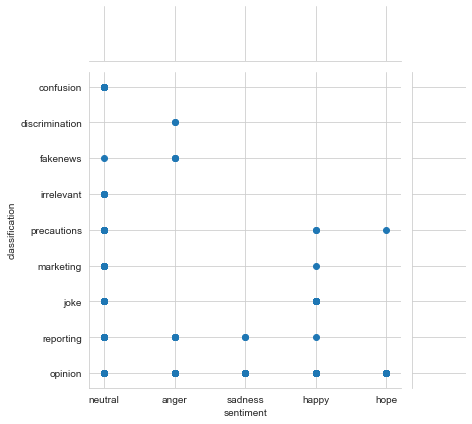

In [7]:
sns.jointplot(x='sentiment',y='classification',data=df)

ValueError: color kwarg must have one color per data set. 5243 data sets and 1 colors were provided

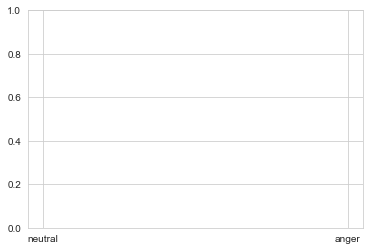

In [8]:
sns.distplot(df['sentiment'],bins=10,kde=False,color='red')

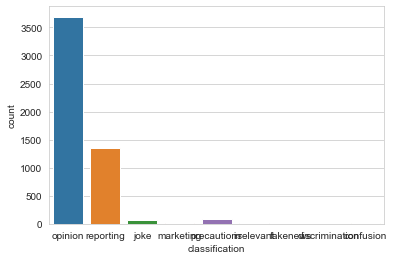

In [12]:
sns.countplot(x='classification',data=df)

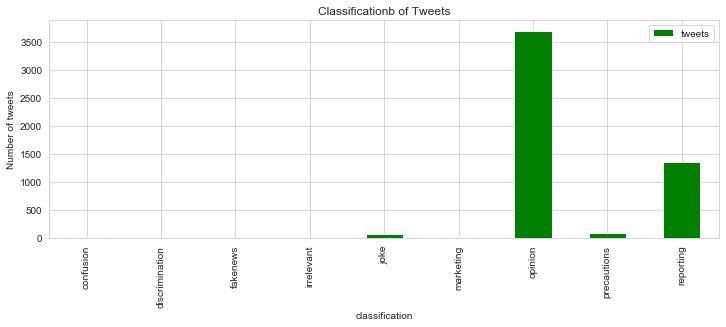

In [17]:
df[['classification','tweets']].groupby('classification').count().plot(kind='bar',color='green',figsize=(12, 4), title='Classificationb of Tweets')
plt.xlabel('classification')
plt.ylabel('Number of tweets')
plt.show()

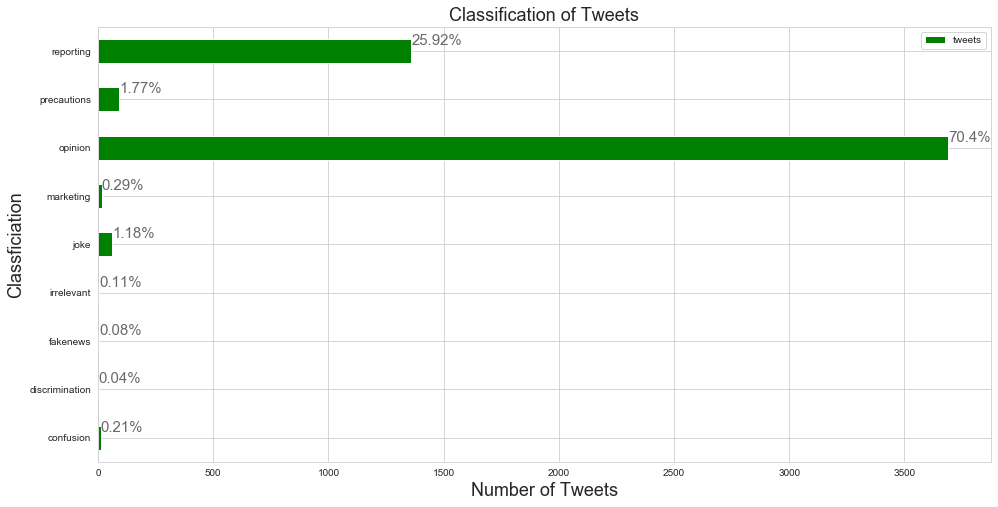

In [35]:
ax = df[['classification','tweets']].groupby('classification').count().plot(kind='barh',color='green',figsize=(16, 8), title='Classificationb of Tweets')
ax.set_alpha(0.8)
ax.set_title("Classification of Tweets", fontsize=18)
ax.set_xlabel("Number of Tweets", fontsize=18);
ax.set_ylabel("Classficiation", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')


plt.show()

In [20]:
df1 = pd.DataFrame
df1 = df[df["classification"] != "opinion"]

In [25]:
df2 = pd.DataFrame
df2 = df1[df1["classification"] != "reporting"]

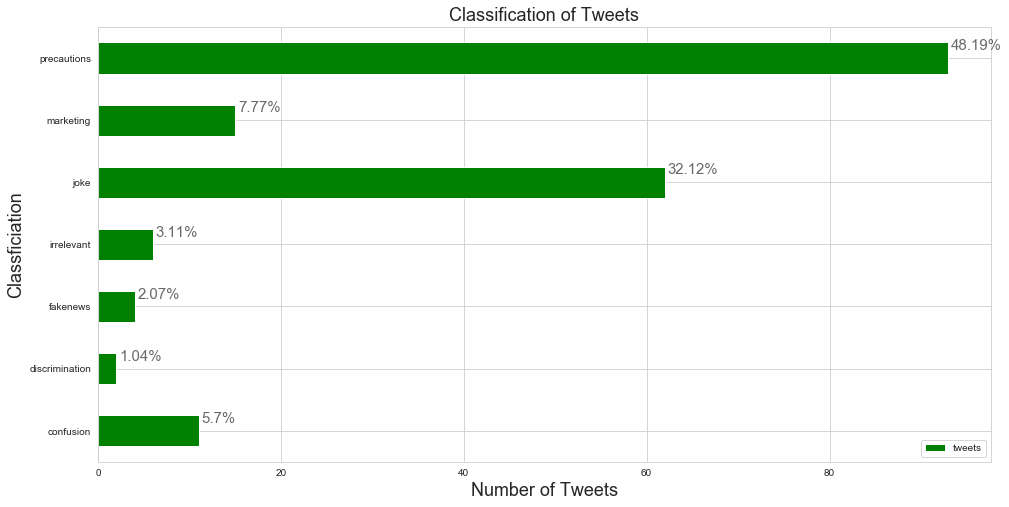

In [33]:
ax = df2[['classification','tweets']].groupby('classification').count().plot(kind='barh',color='green',figsize=(16, 8), title='Classificationb of Tweets')
ax.set_alpha(0.8)
ax.set_title("Classification of Tweets", fontsize=18)
ax.set_xlabel("Number of Tweets", fontsize=18);
ax.set_ylabel("Classficiation", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')


plt.show()

In [11]:
neutral = pd.DataFrame()
neutral = df.loc[df['sentiment'] == 'neutral']
neutral.head()

,Sr. no.,tweets,sentiment,classification
0,1,coronaviruscare el_pais Why am I not surprised...,neutral,opinion
1,2,Spain s el_pais reporting that a recent protoc...,neutral,opinion
2,3,South Korea s aggressive Coronavirus testing h...,neutral,reporting
3,4,South Korea s aggressive Coronavirus testing h...,neutral,reporting
4,5,South Korea s aggressive Coronavirus testing h...,neutral,reporting


In [19]:
neutral['sentiment'].value_counts()
neutral[['classification','tweets']].groupby('classification').count()

,tweets
classification,
confusion,11
fakenews,1
irrelevant,6
joke,16
marketing,14
opinion,2968
precautions,90
reporting,1351


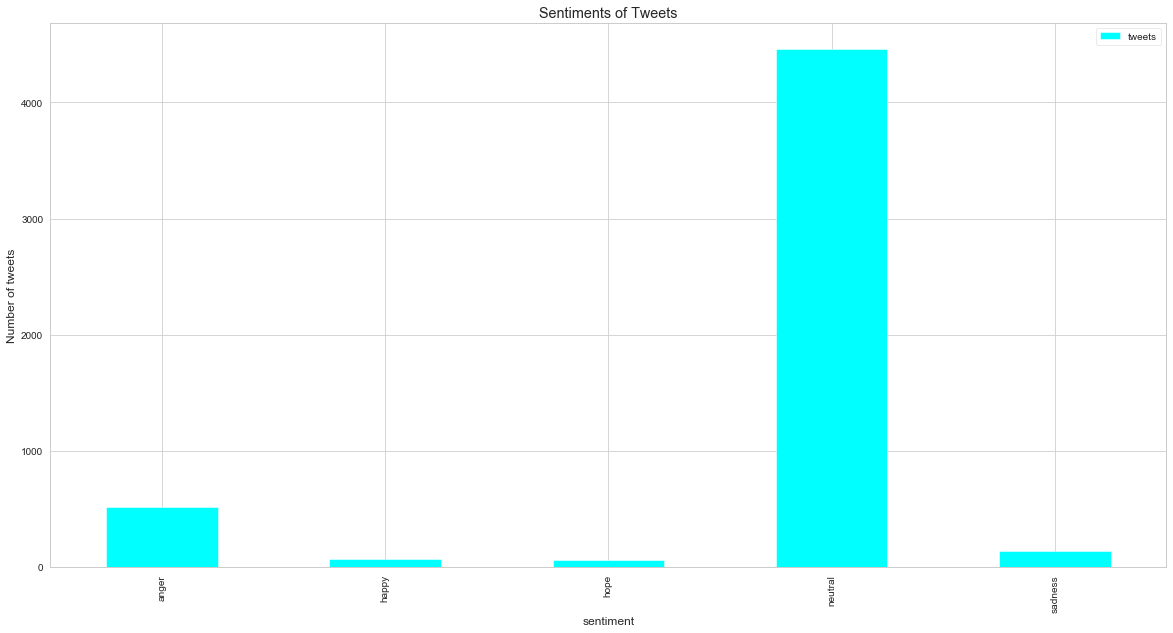

In [48]:
df[['sentiment','tweets']].groupby('sentiment').count().plot(kind='bar',color='cyan',figsize=(20, 10), title='Sentiments of Tweets')
plt.xlabel('sentiment')
plt.ylabel('Number of tweets')
plt.show()